In [29]:
# Import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = "../../Base.csv"
df = pd.read_csv(file_path)

## 0. Testing

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  int64  
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h     

/var/folders/8n/938p8s1s30q6_79sw9qtq5v40000gn/T/ipykernel_83406/1266135864.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='fraud_bool', data=df, palette='coolwarm')


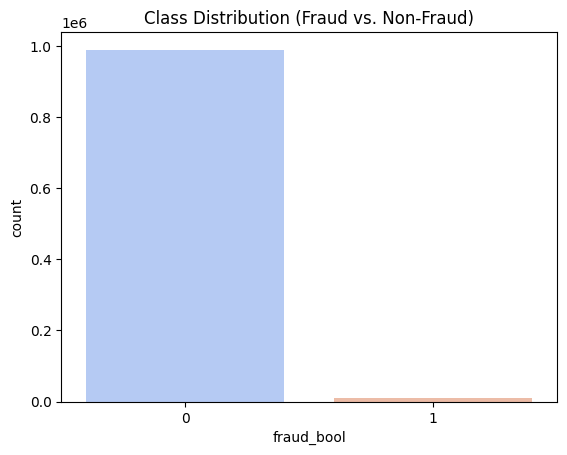

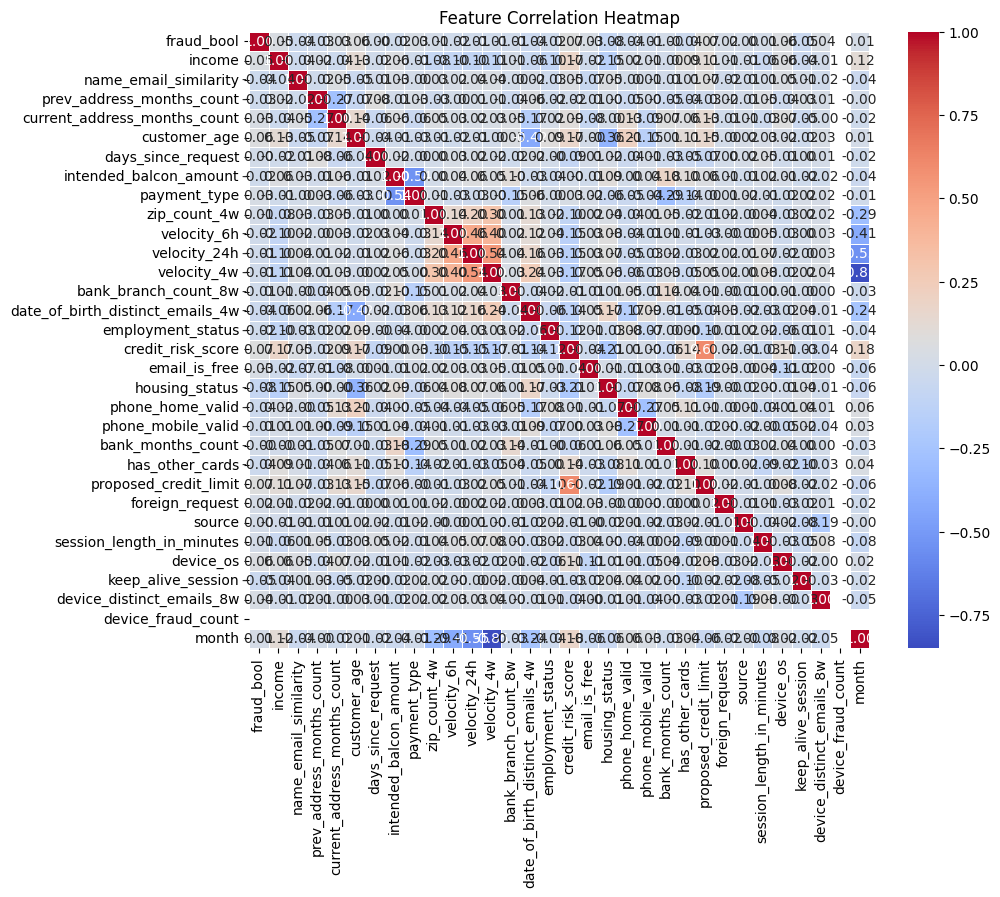

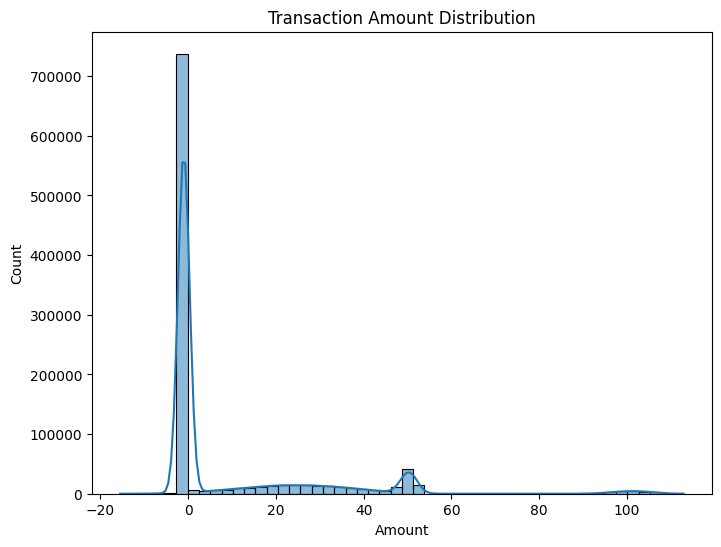

/var/folders/8n/938p8s1s30q6_79sw9qtq5v40000gn/T/ipykernel_83406/1266135864.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='fraud_bool', y='intended_balcon_amount', data=df, palette='coolwarm')


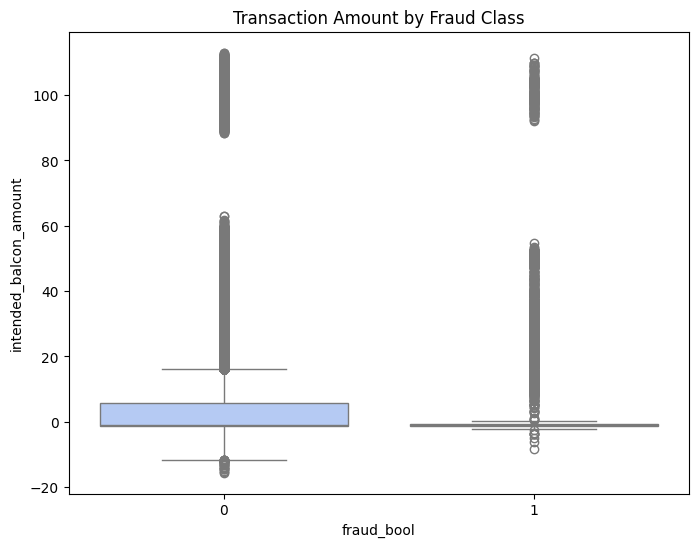

In [38]:
# Display basic information
print("Dataset Information:")
df.info()
print("\nSummary Statistics:")
print(df.describe())
print("\nMissing Values:")
print(df.isnull().sum())

# Checking class distribution (fraud vs. non-fraud)
if 'fraud_bool' in df.columns:
    print("\nClass Distribution:")
    print(df['fraud_bool'].value_counts())
    sns.countplot(x='fraud_bool', data=df, palette='coolwarm')
    plt.title("Class Distribution (Fraud vs. Non-Fraud)")
    plt.show()
else:
    print("fraud_bool column not found. Please verify the fraud label column name.")

# Correlation Heatmap (only numeric columns)
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Visualizing transaction amount distribution (using intended_balcon_amount)
if 'intended_balcon_amount' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df['intended_balcon_amount'], bins=50, kde=True)
    plt.title("Transaction Amount Distribution")
    plt.xlabel("Amount")
    plt.ylabel("Count")
    plt.show()

# Boxplot for fraud vs. non-fraud transactions (using fraud_bool and intended_balcon_amount)
if 'fraud_bool' in df.columns and 'intended_balcon_amount' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='fraud_bool', y='intended_balcon_amount', data=df, palette='coolwarm')
    plt.title("Transaction Amount by Fraud Class")
    plt.show()

## 1. Data Overview

Non-numeric columns: Index(['payment_type', 'employment_status', 'housing_status', 'source',
       'device_os'],
      dtype='object')

Skewness:
 fraud_bool                           9.363838
income                              -0.386337
name_email_similarity                0.042839
prev_address_months_count            4.063888
current_address_months_count         1.386998
customer_age                         0.478079
days_since_request                   9.278955
intended_balcon_amount               2.507173
payment_type                         0.319474
zip_count_4w                         1.456657
velocity_6h                          0.562682
velocity_24h                         0.331134
velocity_4w                         -0.060125
bank_branch_count_8w                 2.747161
date_of_birth_distinct_emails_4w     0.703250
employment_status                    2.381674
credit_risk_score                    0.295895
email_is_free                       -0.119758
housing_status          

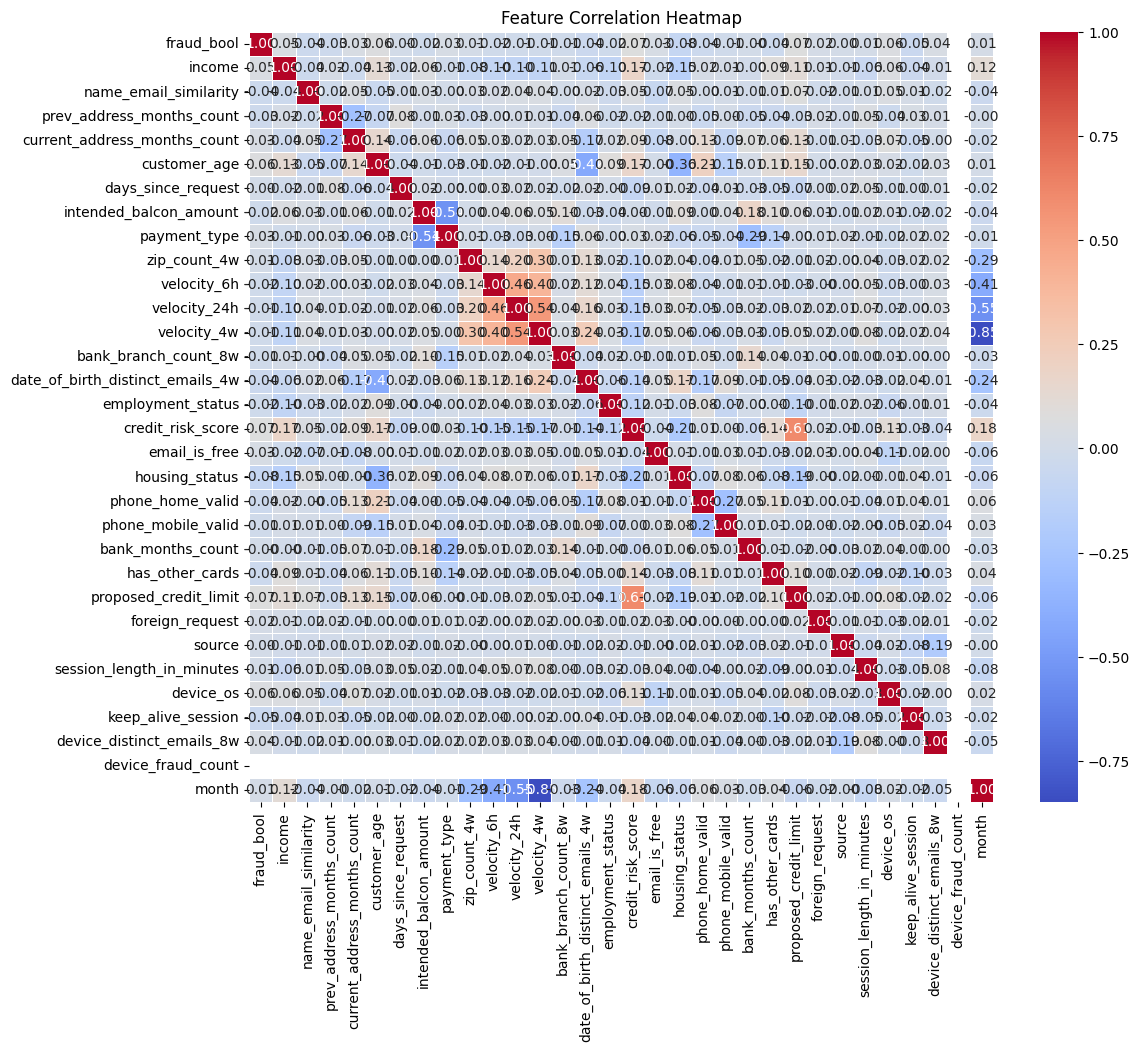

In [ ]:
# Step 1: Identify non-numeric columns
non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns
print("Non-numeric columns:", non_numeric_cols)

# Step 2: Convert categorical columns to numeric using LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Label encode non-numeric columns
for col in non_numeric_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

# Step 3: Calculate skewness and kurtosis for all columns
print("\nSkewness:\n", df.skew())
print("\nKurtosis:\n", df.kurt())

# Step 4: Correlation analysis on all columns
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

## 2. Correlation Analysis

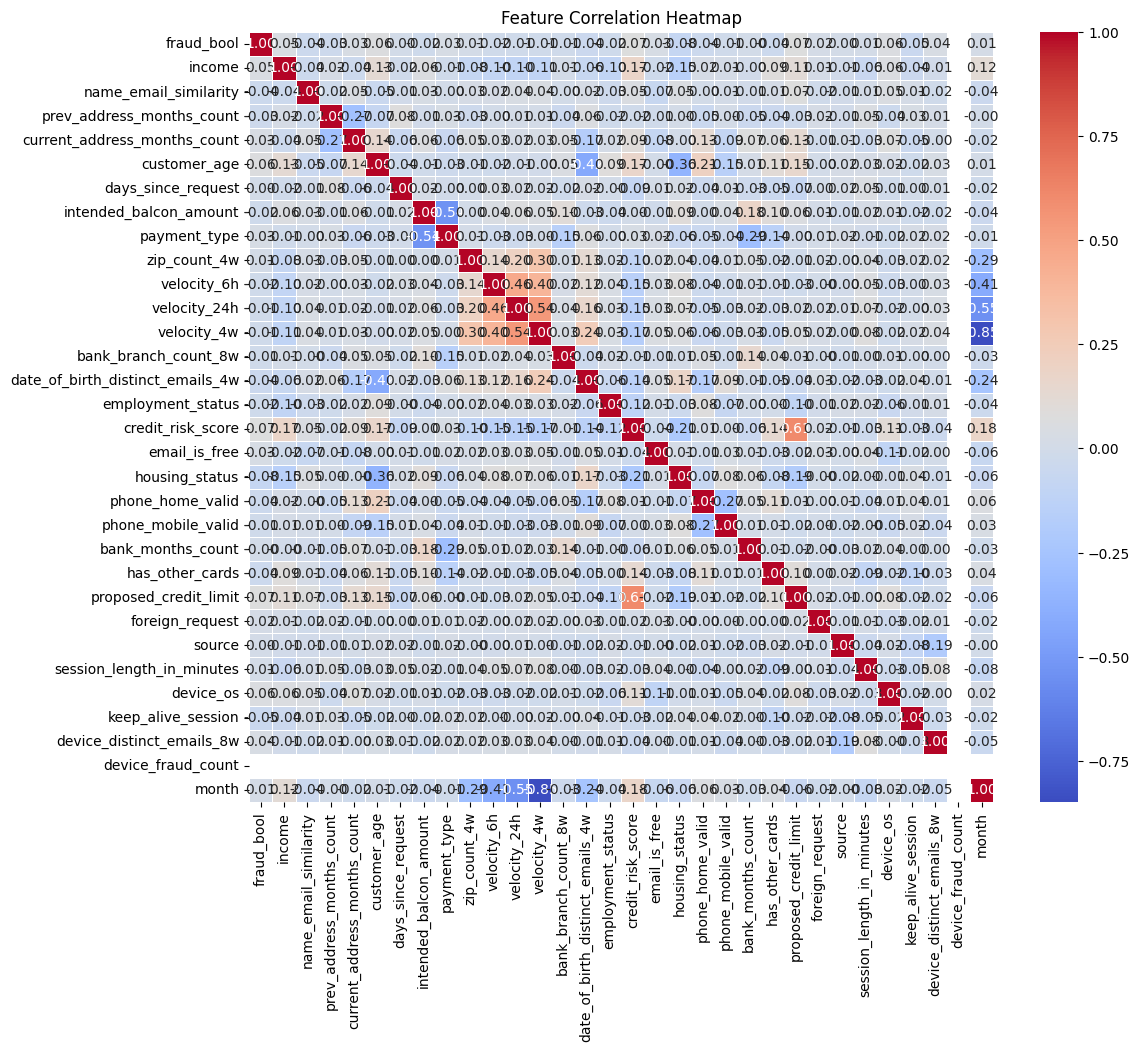

/var/folders/8n/938p8s1s30q6_79sw9qtq5v40000gn/T/ipykernel_83406/2606298431.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_fraud.index, y=corr_fraud.values, palette='coolwarm')


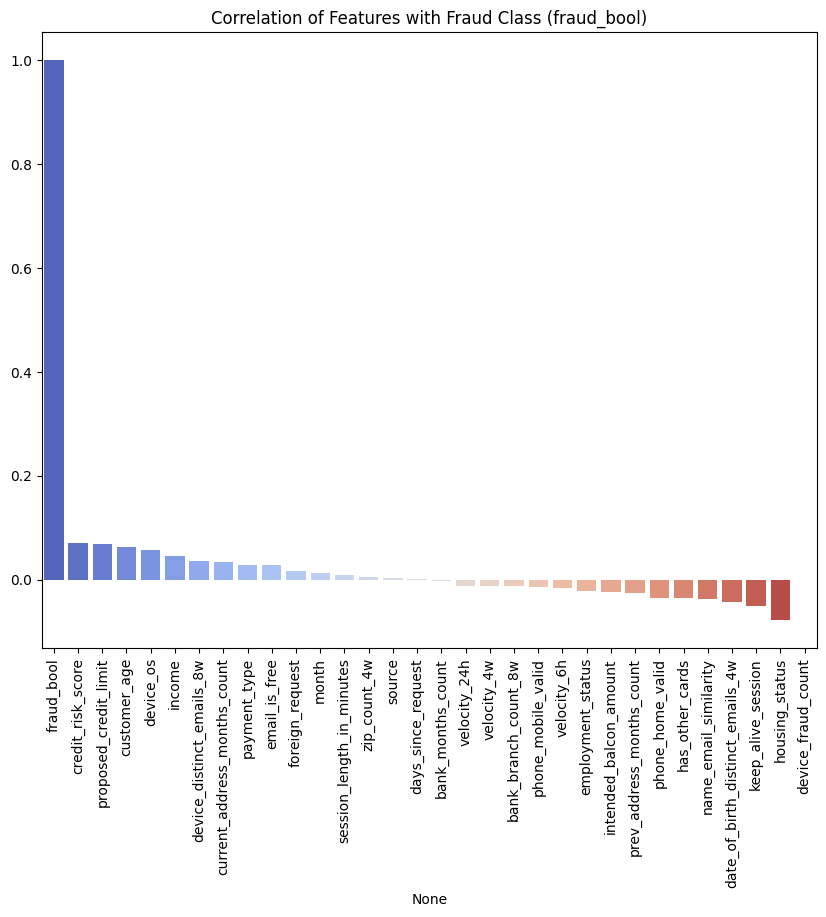

In [32]:
# Correlation Heatmap (only numeric columns)
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Correlation of fraud_bool with all other features
plt.figure(figsize=(10, 8))
corr_fraud = numeric_df.corr()['fraud_bool'].sort_values(ascending=False)
sns.barplot(x=corr_fraud.index, y=corr_fraud.values, palette='coolwarm')
plt.title("Correlation of Features with Fraud Class (fraud_bool)")
plt.xticks(rotation=90)
plt.show()


## 3. Distribution Analysis

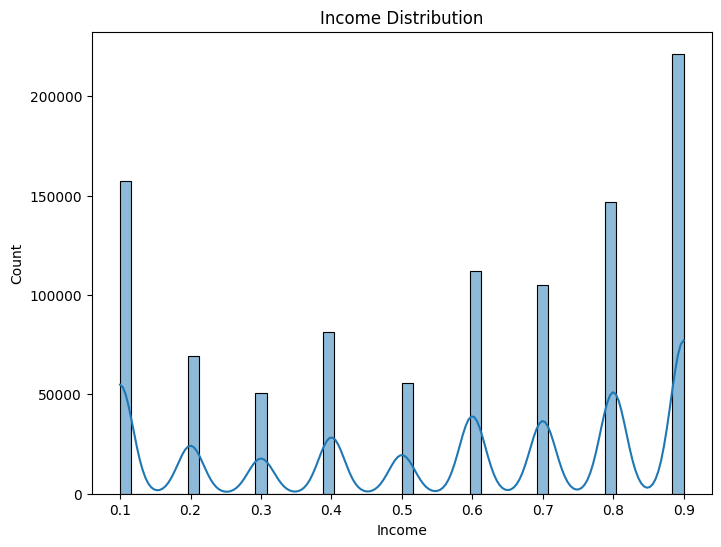

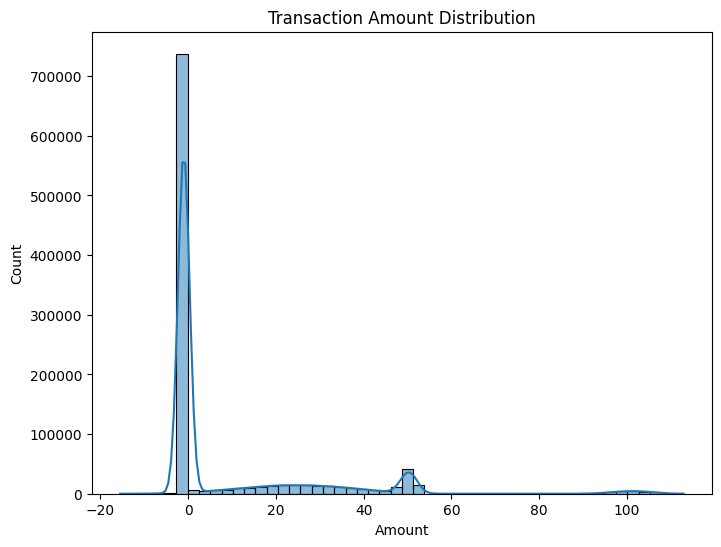

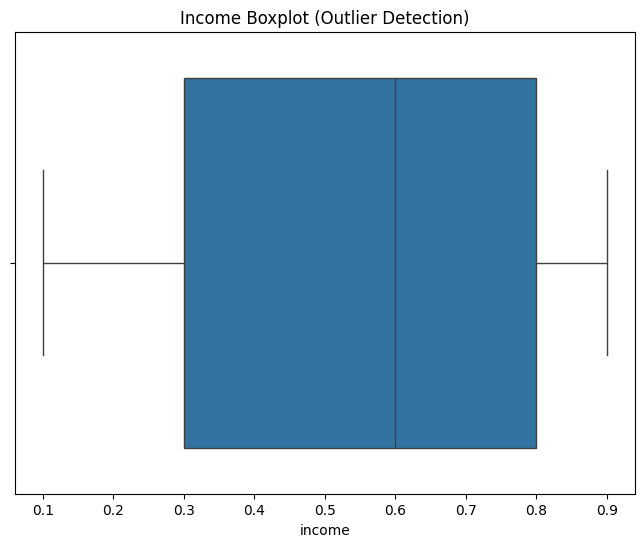

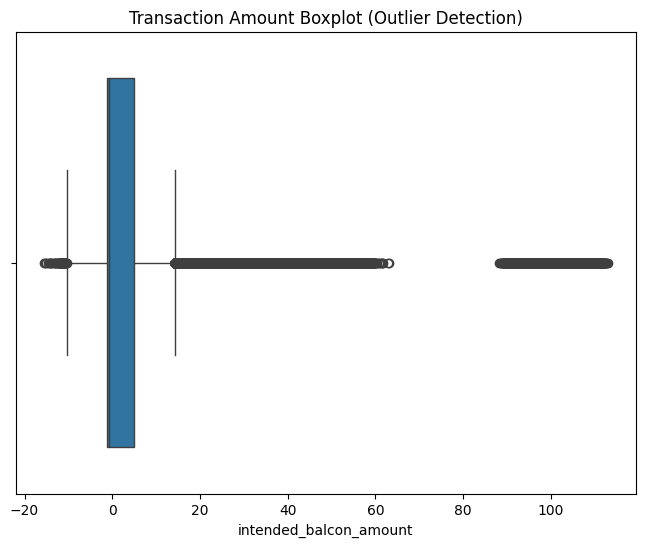

In [33]:
# Visualizing distribution for income and intended_balcon_amount
plt.figure(figsize=(8, 6))
sns.histplot(df['income'], bins=50, kde=True)
plt.title("Income Distribution")
plt.xlabel("Income")
plt.ylabel("Count")
plt.show()

# Distribution of intended_balcon_amount (assuming it's related to transaction amounts)
plt.figure(figsize=(8, 6))
sns.histplot(df['intended_balcon_amount'], bins=50, kde=True)
plt.title("Transaction Amount Distribution")
plt.xlabel("Amount")
plt.ylabel("Count")
plt.show()

# Boxplots for outliers detection
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['income'])
plt.title("Income Boxplot (Outlier Detection)")
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['intended_balcon_amount'])
plt.title("Transaction Amount Boxplot (Outlier Detection)")
plt.show()

## 4. Fraud vs. Non-Fraud Analysis

/var/folders/8n/938p8s1s30q6_79sw9qtq5v40000gn/T/ipykernel_83406/2275115736.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='fraud_bool', y='intended_balcon_amount', data=df, palette='coolwarm')


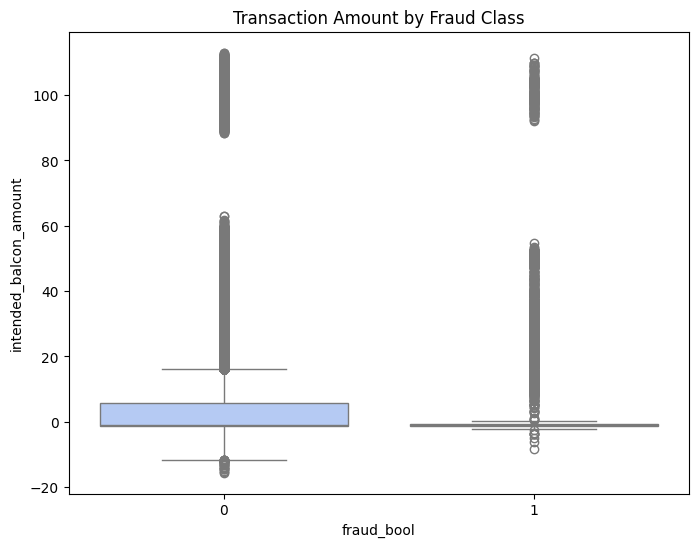

/var/folders/8n/938p8s1s30q6_79sw9qtq5v40000gn/T/ipykernel_83406/2275115736.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='fraud_bool', y='income', data=df, palette='coolwarm')


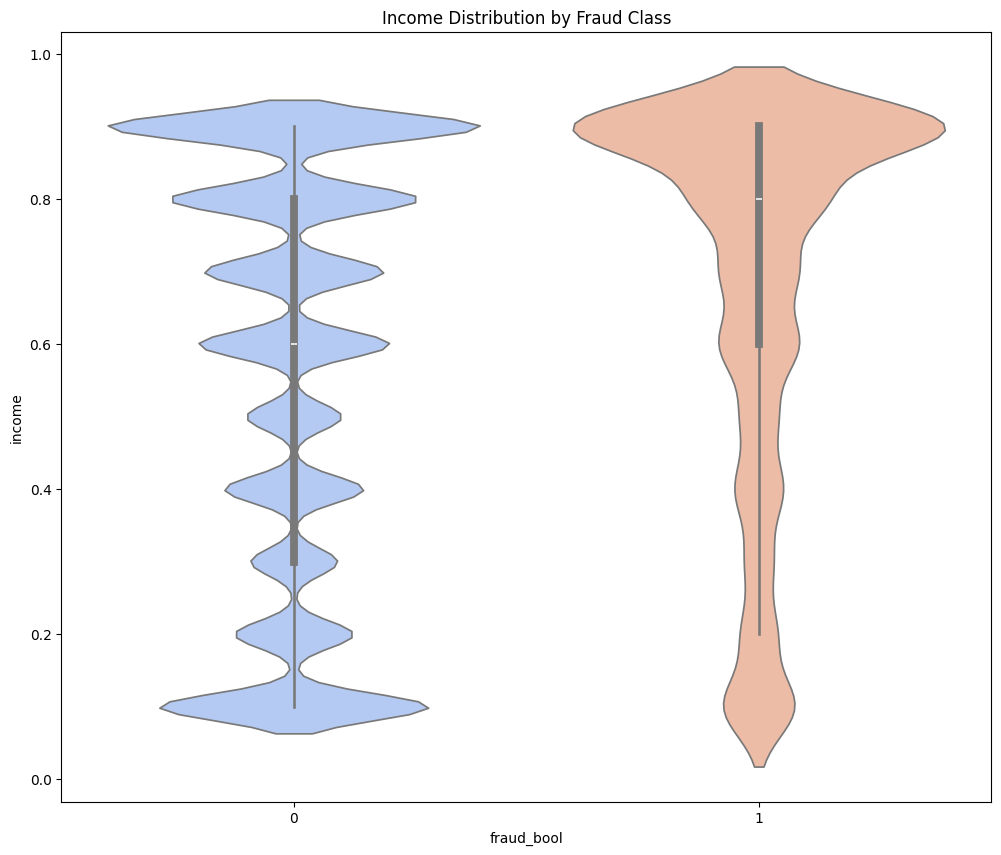

/var/folders/8n/938p8s1s30q6_79sw9qtq5v40000gn/T/ipykernel_83406/2275115736.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='fraud_bool', y='customer_age', data=df, palette='coolwarm')


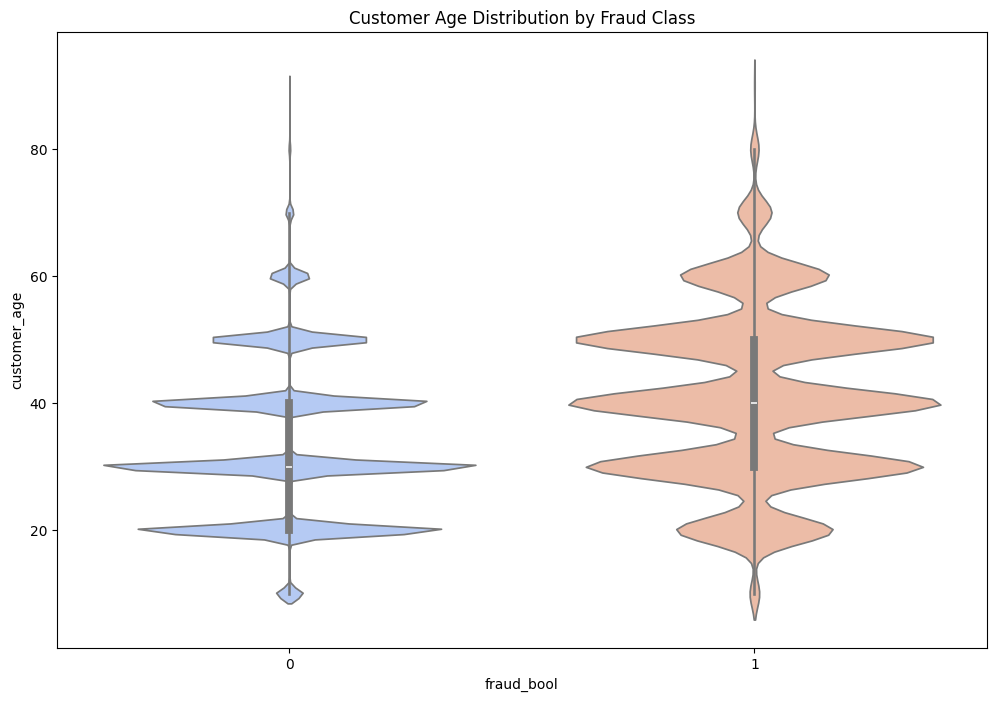

In [34]:
# Boxplot for fraud vs. non-fraud transactions (Transaction Amount)
plt.figure(figsize=(8, 6))
sns.boxplot(x='fraud_bool', y='intended_balcon_amount', data=df, palette='coolwarm')
plt.title("Transaction Amount by Fraud Class")
plt.show()

# Violin plot for fraud vs. non-fraud comparisons across multiple features
plt.figure(figsize=(12, 10))
sns.violinplot(x='fraud_bool', y='income', data=df, palette='coolwarm')
plt.title("Income Distribution by Fraud Class")
plt.show()

# Comparing other features across fraud classes (e.g., customer_age, velocity_6h)
plt.figure(figsize=(12, 8))
sns.violinplot(x='fraud_bool', y='customer_age', data=df, palette='coolwarm')
plt.title("Customer Age Distribution by Fraud Class")
plt.show()

## 5. Categorical Feature Analysis

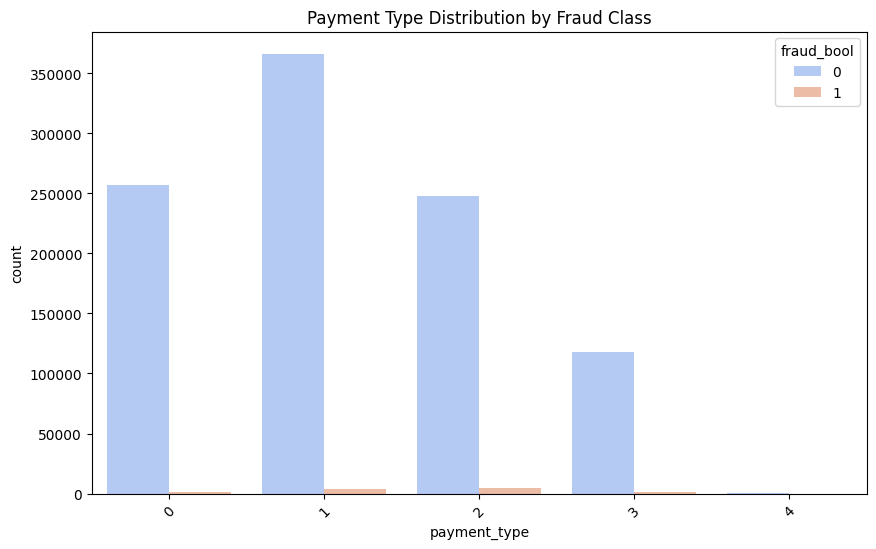

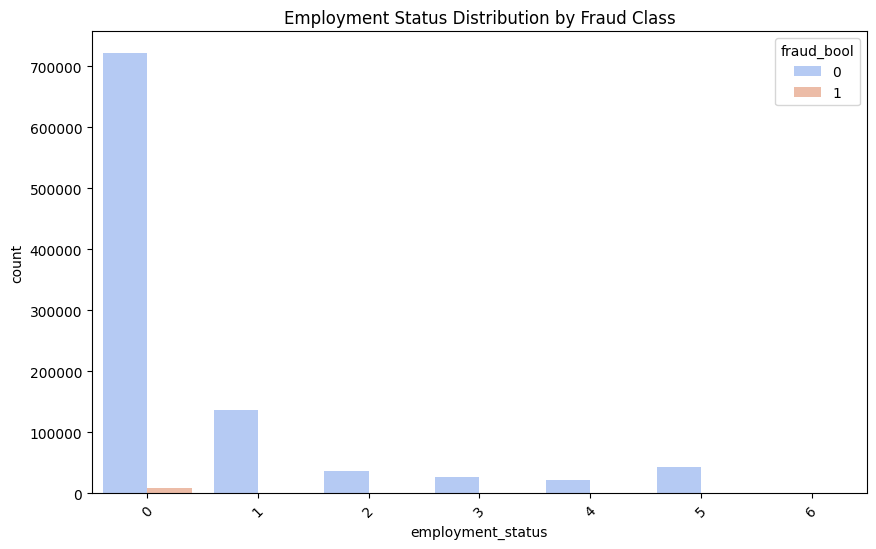

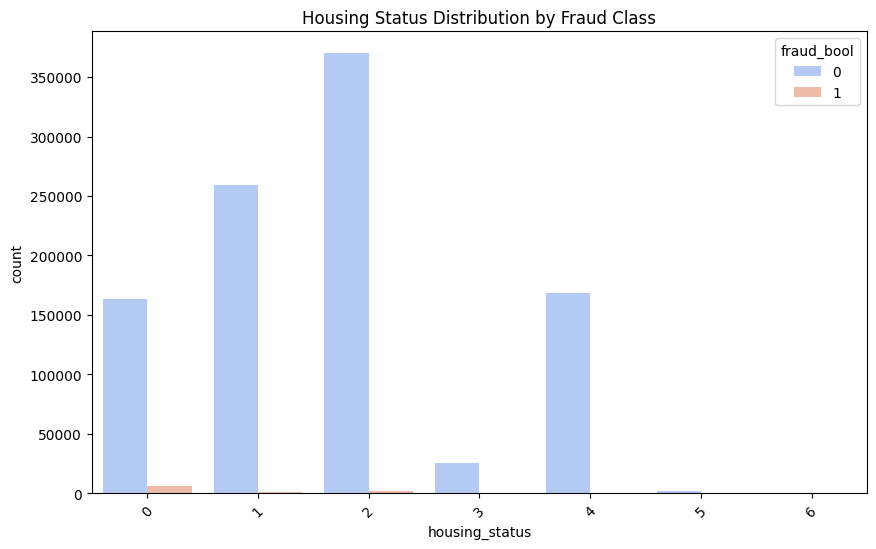

In [35]:
# Visualize the distribution of categorical features
plt.figure(figsize=(10, 6))
sns.countplot(x='payment_type', hue='fraud_bool', data=df, palette='coolwarm')
plt.title("Payment Type Distribution by Fraud Class")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='employment_status', hue='fraud_bool', data=df, palette='coolwarm')
plt.title("Employment Status Distribution by Fraud Class")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='housing_status', hue='fraud_bool', data=df, palette='coolwarm')
plt.title("Housing Status Distribution by Fraud Class")
plt.xticks(rotation=45)
plt.show()

## 6. Time-based Analysis 

/Users/shreyar/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


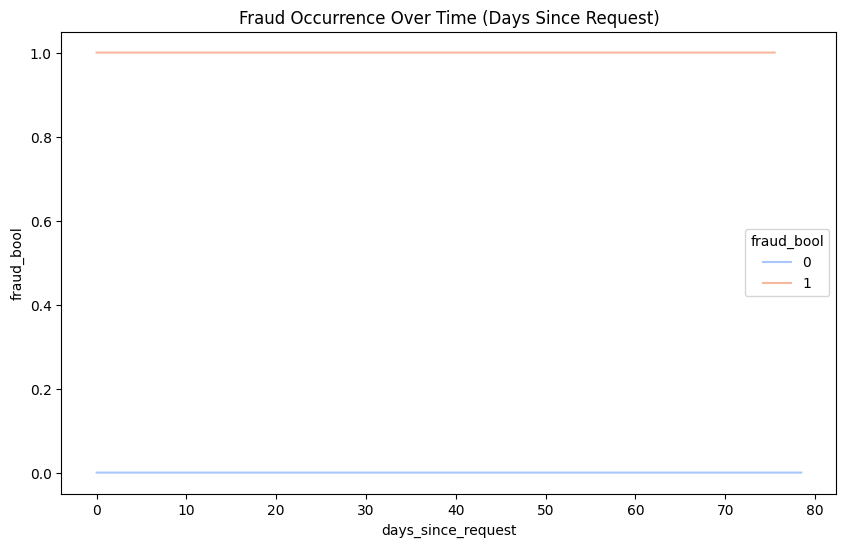

In [36]:
# Visualize fraud occurrence over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='days_since_request', y='fraud_bool', data=df, hue='fraud_bool', palette='coolwarm')
plt.title("Fraud Occurrence Over Time (Days Since Request)")
plt.show()

## 7. Model Evaluation

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Define target and features
X = df.drop(columns=['fraud_bool'])  # Drop the target column
y = df['fraud_bool']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Feature importance
feature_importances = model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)


              precision    recall  f1-score   support

           0       0.99      1.00      0.99    296786
           1       0.50      0.00      0.00      3214

    accuracy                           0.99    300000
   macro avg       0.74      0.50      0.50    300000
weighted avg       0.98      0.99      0.98    300000

                             Feature  Importance
1              name_email_similarity    0.074600
5                 days_since_request    0.070012
11                       velocity_4w    0.068523
15                 credit_risk_score    0.066583
25         session_length_in_minutes    0.066005
9                        velocity_6h    0.065397
8                       zip_count_4w    0.064817
6             intended_balcon_amount    0.064587
10                      velocity_24h    0.063550
3       current_address_months_count    0.058823
13  date_of_birth_distinct_emails_4w    0.042324
12              bank_branch_count_8w    0.040087
20                 bank_months_count